In [1]:
import csv
import pandas as pd
import datetime as dt
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec

%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.dpi'] = 80

import seaborn as sns
sns.set_style("darkgrid")
mpl.style.use('ggplot')

In [2]:
# jupyter notebook setup
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
rootPath = '/Users/khazi/Documents/HiWi/KIT_gitlab/cn-data/weather_data/'

In [4]:
build_1 = 'Building_445'
build_2 = 'Building_668'

In [5]:
building_445_path = rootPath + build_1 + '/'
building_668_path = rootPath + build_2 + '/'


#### Building 445 all csv read

In [6]:
air_pressure_445   = pd.read_csv(building_445_path + '445-Air_Pressure.csv', sep =',', header = 1) # add datetime parse dates
brightness_445     = pd.read_csv(building_445_path + '445-Brightness.csv', sep =',', header = 1)
cloud_coverage_445 = pd.read_csv(building_445_path + '445-Cloud_Coverage.csv', sep =',', header = 1)
humidity_445       = pd.read_csv(building_445_path + '445-Humidity.csv', sep =',', header = 1)
insolation_445     = pd.read_csv(building_445_path + '445-Insolation.csv', sep =',', header = 1)
rainfall_445       = pd.read_csv(building_445_path + '445-Rain_Fall.csv', sep =',', header = 1)
synoptic_code_445  = pd.read_csv(building_445_path + '445-Synoptic_Code.csv', sep =',', header = 1)
temperature_445    = pd.read_csv(building_445_path + '445-Temperature.csv', sep =',', header = 1)
wind_direction_445     = pd.read_csv(building_445_path + '445-Wind_Direction.csv', sep =',', header = 1)
wind_speed_445     = pd.read_csv(building_445_path + '445-Wind_Speed.csv', sep =',', header = 1)
units_445          = pd.read_csv(building_445_path + 'units.csv', sep =',', header = 1)

#### Verify all the csv files have non null values

In [7]:
#air_pressure_445.isnull().values.sum()    #8 null values
#brightness_445.isnull().values.sum()      #8 null values  
#cloud_coverage_445.isnull().values.sum()  #8 null values
#humidity_445.isnull().values.sum()        #8 null values
#insolation_445.isnull().values.sum()      #8 null values
#rainfall_445.isnull().values.sum()        #9 null values
#synoptic_code_445.isnull().values.sum()   #8 null values
#temperature_445.isnull().values.sum()     #8 null values
#wind_direction_445.isnull().values.sum()  #8 null values
#wind_speed_445.isnull().values.sum()      #8 null values

#### Since its a time series data forwardfill/backwardfill would be a good choice, however, first 6 records are nullvalues therefore backwardfill fits better

In [8]:
air_pressure_445   = air_pressure_445.fillna(method = 'bfill')
brightness_445     = brightness_445.fillna(method = 'bfill')
cloud_coverage_445 = cloud_coverage_445.fillna(method = 'bfill')
humidity_445       = humidity_445.fillna(method = 'bfill')
insolation_445     = insolation_445.fillna(method = 'bfill')
rainfall_445       = rainfall_445.fillna(method = 'bfill')
synoptic_code_445  = synoptic_code_445.fillna(method = 'bfill')
temperature_445    = temperature_445.fillna(method = 'bfill')
wind_direction_445 = wind_direction_445.fillna(method = 'bfill')
wind_speed_445     = wind_speed_445.fillna(method = 'bfill')

In [9]:
#weather_list[0]['weather.mean'].unique()

In [10]:
### after backwardfill, it is observed that the last record of rainfall is null because backward fill cannot be used. 
### use forwardfill
indexes = rainfall_445['weather.mean'].index[rainfall_445['weather.mean'].apply(np.isnan)]
rainfall_445 = rainfall_445.fillna(method = 'ffill')

In [11]:
rainfall_445['weather.mean'][2745] ## after backword fill the last record is now updated

0.29100000000000004

In [12]:
brightness_445.info() # no missing values, however Time column should be changed to timeseries format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745 entries, 0 to 2744
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          2745 non-null   object 
 1   weather.mean  2745 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.0+ KB


#### Separate list of all the mediums 

In [13]:
weather_list_445 = [air_pressure_445,brightness_445,cloud_coverage_445,humidity_445,insolation_445,
               rainfall_445,synoptic_code_445,temperature_445,wind_direction_445,wind_speed_445]

#### Building 668 all csv read

In [14]:
air_pressure_668   = pd.read_csv(building_668_path + '668-Air_Pressure.csv', sep =',', header = 1) # add datetime parse dates
brightness_668     = pd.read_csv(building_668_path + '668-Brightness.csv', sep =',', header = 1)
cloud_coverage_668 = pd.read_csv(building_668_path + '668-Cloud_Coverage.csv', sep =',', header = 1)
humidity_668       = pd.read_csv(building_668_path + '668-Humidity.csv', sep =',', header = 1)
insolation_668     = pd.read_csv(building_668_path + '668-Insolation.csv', sep =',', header = 1)
rainfall_668       = pd.read_csv(building_668_path + '668-Rain_Fall.csv', sep =',', header = 1)
synoptic_code_668  = pd.read_csv(building_668_path + '668-Synoptic_Code.csv', sep =',', header = 1)
temperature_668    = pd.read_csv(building_668_path + '668-Temperature.csv', sep =',', header = 1)
wind_direction_668 = pd.read_csv(building_668_path + '668-Wind_Direction.csv', sep =',', header = 1)
wind_speed_668     = pd.read_csv(building_668_path + '668-Wind_Speed.csv', sep =',', header = 1)

#### Building668: Verify all the csv files have non null values

In [15]:
#air_pressure_668.isnull().values.sum()    #8 null values 
#brightness_668.isnull().values.sum()      #8 null values
#cloud_coverage_668.isnull().values.sum()  #8 null values
#humidity_668.isnull().values.sum()        #8 null values
#insolation_668.isnull().values.sum()      #8 null values
#rainfall_668.isnull().values.sum()        #9 null values
#synoptic_code_668.isnull().values.sum()   #8 null values
#temperature_668.isnull().values.sum()     #8 null values
#wind_direction_668.isnull().values.sum()  #8 null values
#wind_speed_668.isnull().values.sum()      #8 null values

In [16]:
air_pressure_668   = air_pressure_668.fillna(method = 'bfill')
brightness_668     = brightness_668.fillna(method = 'bfill')
cloud_coverage_668 = cloud_coverage_668.fillna(method = 'bfill')
humidity_668       = humidity_668.fillna(method = 'bfill')
insolation_668     = insolation_668.fillna(method = 'bfill')
rainfall_668       = rainfall_668.fillna(method = 'bfill')
synoptic_code_668  = synoptic_code_668.fillna(method = 'bfill')
temperature_668    = temperature_668.fillna(method = 'bfill')
wind_direction_668 = wind_direction_668.fillna(method = 'bfill')
wind_speed_668     = wind_speed_668.fillna(method = 'bfill')

#### create the list of all the mediums for Building668

In [17]:
weather_list_668 = [air_pressure_668,brightness_668,cloud_coverage_668,humidity_668,insolation_668,
               rainfall_668,synoptic_code_668,temperature_668,wind_direction_668,wind_speed_668]

#### Building_445 : Convert Timestamp to datetime format 

In [18]:
air_pressure_445['Time'] = pd.to_datetime(air_pressure_445['Time'])
brightness_445['Time'] = pd.to_datetime(brightness_445['Time'])

cloud_coverage_445['Time'] = pd.to_datetime(cloud_coverage_445['Time'])
humidity_445['Time'] = pd.to_datetime(humidity_445['Time'])

insolation_445['Time'] = pd.to_datetime(insolation_445['Time'])
rainfall_445['Time'] = pd.to_datetime(rainfall_445['Time'])

synoptic_code_445['Time'] = pd.to_datetime(synoptic_code_445['Time'])
temperature_445['Time'] = pd.to_datetime(temperature_445['Time'])

wind_direction_445['Time'] = pd.to_datetime(wind_direction_445['Time'])
wind_speed_445['Time'] = pd.to_datetime(wind_speed_445['Time'])

In [19]:
air_pressure_445

,Time,weather.mean
0,2021-07-30 00:00:00,999.0
1,2021-07-30 00:15:00,999.0
2,2021-07-30 00:30:00,999.0
3,2021-07-30 00:45:00,999.0
4,2021-07-30 01:00:00,999.0
5,2021-07-30 01:15:00,999.0
6,2021-07-30 01:30:00,999.0
7,2021-07-30 01:45:00,999.0
8,2021-07-30 02:00:00,999.0
9,2021-07-30 02:15:00,999.0


#### Building_668: Convert Timestamp to datetime format 

In [20]:
air_pressure_668['Time'] = pd.to_datetime(air_pressure_668['Time'])
brightness_668['Time'] = pd.to_datetime(brightness_668['Time'])

cloud_coverage_668['Time'] = pd.to_datetime(cloud_coverage_668['Time'])
humidity_668['Time'] = pd.to_datetime(humidity_668['Time'])

insolation_668['Time'] = pd.to_datetime(insolation_668['Time'])
rainfall_668['Time'] = pd.to_datetime(rainfall_668['Time'])

synoptic_code_668['Time'] = pd.to_datetime(synoptic_code_668['Time'])
temperature_668['Time'] = pd.to_datetime(temperature_668['Time'])

wind_direction_668['Time'] = pd.to_datetime(wind_direction_668['Time'])
wind_speed_668['Time'] = pd.to_datetime(wind_speed_668['Time'])

#### Building_445: Date time extraction from all mediums 

In [21]:
air_pressure_445['Date']   = air_pressure_445['Time'].dt.date
air_pressure_445['Zeit']   = air_pressure_445['Time'].dt.time

brightness_445['Date']     = brightness_445['Time'].dt.date
brightness_445['Zeit']     = brightness_445['Time'].dt.time

cloud_coverage_445['Date'] = cloud_coverage_445['Time'].dt.date
cloud_coverage_445['Zeit'] = cloud_coverage_445['Time'].dt.time

humidity_445['Date']       = humidity_445['Time'].dt.date
humidity_445['Zeit']       = humidity_445['Time'].dt.time

insolation_445['Date']     = insolation_445['Time'].dt.date
insolation_445['Zeit']     = insolation_445['Time'].dt.time

rainfall_445['Date']       = rainfall_445['Time'].dt.date
rainfall_445['Zeit']       = rainfall_445['Time'].dt.time

synoptic_code_445['Date']  = synoptic_code_445['Time'].dt.date
synoptic_code_445['Zeit']  = synoptic_code_445['Time'].dt.time

temperature_445['Date']    = temperature_445['Time'].dt.date
temperature_445['Zeit']    = temperature_445['Time'].dt.time

wind_direction_445['Date']     = wind_direction_445['Time'].dt.date
wind_direction_445['Zeit']     = wind_direction_445['Time'].dt.time

wind_speed_445['Date']     = wind_speed_445['Time'].dt.date
wind_speed_445['Zeit']     = wind_speed_445['Time'].dt.time

#### Building668 : Date time extraction from all mediums

In [22]:
air_pressure_668['Date']   = air_pressure_668['Time'].dt.date
air_pressure_668['Zeit']   = air_pressure_668['Time'].dt.time

brightness_668['Date']     = brightness_668['Time'].dt.date
brightness_668['Zeit']     = brightness_668['Time'].dt.time

cloud_coverage_668['Date'] = cloud_coverage_668['Time'].dt.date
cloud_coverage_668['Zeit'] = cloud_coverage_668['Time'].dt.time

humidity_668['Date']       = humidity_668['Time'].dt.date
humidity_668['Zeit']       = humidity_668['Time'].dt.time

insolation_668['Date']     = insolation_668['Time'].dt.date
insolation_668['Zeit']     = insolation_668['Time'].dt.time

rainfall_668['Date']       = rainfall_668['Time'].dt.date
rainfall_668['Zeit']       = rainfall_668['Time'].dt.time

synoptic_code_668['Date']  = synoptic_code_668['Time'].dt.date
synoptic_code_668['Zeit']  = synoptic_code_668['Time'].dt.time

temperature_668['Date']    = temperature_668['Time'].dt.date
temperature_668['Zeit']    = temperature_668['Time'].dt.time

wind_direction_668['Date']     = wind_direction_668['Time'].dt.date
wind_direction_668['Zeit']     = wind_direction_668['Time'].dt.time

wind_speed_668['Date']     = wind_speed_668['Time'].dt.date
wind_speed_668['Zeit']     = wind_speed_668['Time'].dt.time

#### Plot : Since there are 96 different readings for each day, the graph has many overlaping values, but we need a simple line graph, therefore daily average should be calculated

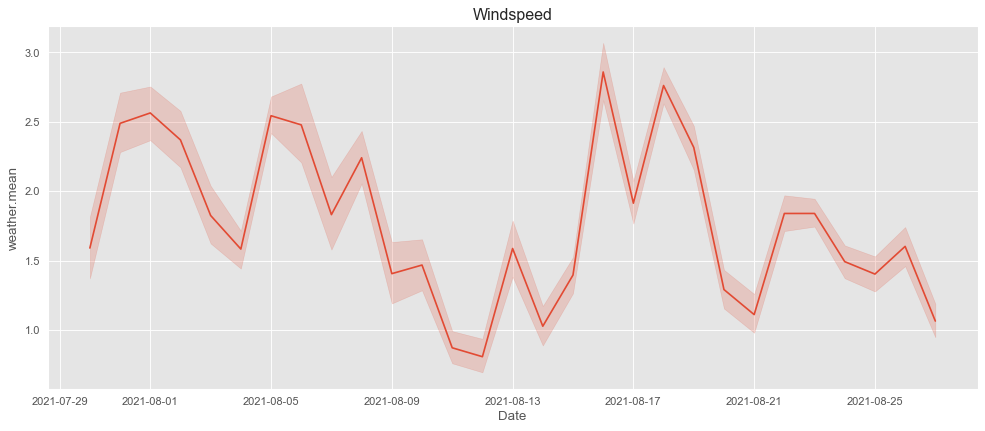

In [23]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Date',y='weather.mean',data=wind_speed_445).set(title='Windspeed')
plt.show()

#### Building445 : Unique date and time extaction from all measures 

In [24]:
unq_time_air_pressure_445   = air_pressure_445.Zeit.unique()
unq_time_brightness_445     = brightness_445.Zeit.unique()
unq_time_cloud_coverage_445 = cloud_coverage_445.Zeit.unique()
unq_time_humidity_445       = humidity_445.Zeit.unique()
unq_time_insolation_445     = insolation_445.Zeit.unique()
unq_time_rainfall_445       = rainfall_445.Zeit.unique()
unq_time_synoptic_code_445  = synoptic_code_445.Zeit.unique()
unq_time_temperature_445    = temperature_445.Zeit.unique()
unq_time_wind_direction_445 = wind_direction_445.Zeit.unique()
unq_time_wind_speed_445     = wind_speed_445.Zeit.unique()

In [25]:
unq_date_air_pressure_445   = air_pressure_445.Date.unique()
unq_date_brightness_445     = brightness_445.Date.unique()
unq_date_cloud_coverage_445 = cloud_coverage_445.Date.unique()
unq_date_humidity_445       = humidity_445.Date.unique()
unq_date_insolation_445     = insolation_445.Date.unique()
unq_date_rainfall_445       = rainfall_445.Date.unique()
unq_date_synoptic_code_445  = synoptic_code_445.Date.unique()
unq_date_temperature_445    = temperature_445.Date.unique()
unq_date_wind_direction_445 = wind_direction_445.Date.unique()
unq_date_wind_speed_445     = wind_speed_445.Date.unique()

In [26]:
unq_date_air_pressure_445

array([datetime.date(2021, 7, 30), datetime.date(2021, 7, 31),
       datetime.date(2021, 8, 1), datetime.date(2021, 8, 2),
       datetime.date(2021, 8, 3), datetime.date(2021, 8, 4),
       datetime.date(2021, 8, 5), datetime.date(2021, 8, 6),
       datetime.date(2021, 8, 7), datetime.date(2021, 8, 8),
       datetime.date(2021, 8, 9), datetime.date(2021, 8, 10),
       datetime.date(2021, 8, 11), datetime.date(2021, 8, 12),
       datetime.date(2021, 8, 13), datetime.date(2021, 8, 14),
       datetime.date(2021, 8, 15), datetime.date(2021, 8, 16),
       datetime.date(2021, 8, 17), datetime.date(2021, 8, 18),
       datetime.date(2021, 8, 19), datetime.date(2021, 8, 20),
       datetime.date(2021, 8, 21), datetime.date(2021, 8, 22),
       datetime.date(2021, 8, 23), datetime.date(2021, 8, 24),
       datetime.date(2021, 8, 25), datetime.date(2021, 8, 26),
       datetime.date(2021, 8, 27)], dtype=object)

#### Building668 : Unique date and time extaction from all measures 

In [27]:
unq_time_air_pressure_668   = air_pressure_668.Zeit.unique()
unq_time_brightness_668     = brightness_668.Zeit.unique()
unq_time_cloud_coverage_668 = cloud_coverage_668.Zeit.unique()
unq_time_humidity_668       = humidity_668.Zeit.unique()
unq_time_insolation_668     = insolation_668.Zeit.unique()
unq_time_rainfall_668       = rainfall_668.Zeit.unique()
unq_time_synoptic_code_668  = synoptic_code_668.Zeit.unique()
unq_time_temperature_668    = temperature_668.Zeit.unique()
unq_time_wind_direction_668 = wind_direction_668.Zeit.unique()
unq_time_wind_speed_668     = wind_speed_668.Zeit.unique()

In [28]:
unq_date_air_pressure_668   = air_pressure_668.Date.unique()
unq_date_brightness_668     = brightness_668.Date.unique()
unq_date_cloud_coverage_668 = cloud_coverage_668.Date.unique()
unq_date_humidity_668       = humidity_668.Date.unique()
unq_date_insolation_668     = insolation_668.Date.unique()
unq_date_rainfall_668       = rainfall_668.Date.unique()
unq_date_synoptic_code_668  = synoptic_code_668.Date.unique()
unq_date_temperature_668    = temperature_668.Date.unique()
unq_date_wind_direction_668 = wind_direction_668.Date.unique()
unq_date_wind_speed_668     = wind_speed_668.Date.unique()

#### Building445: List of all the medims with unique date and time

In [29]:
unique_date_mediums_list_445 = [unq_date_air_pressure_445,unq_date_brightness_445,unq_date_cloud_coverage_445,unq_date_humidity_445,
                            unq_date_insolation_445, unq_date_rainfall_445, unq_date_synoptic_code_445,unq_date_temperature_445,
                            unq_date_wind_direction_445, unq_date_wind_speed_445]

#unique_date_mediums_list_445 = ['unq_date_air_pressure_445','unq_date_brightness_445','unq_date_cloud_coverage_445','unq_date_humidity_445',
#                            'unq_date_insolation_445', 'unq_date_rainfall_445', 'unq_date_synoptic_code_445','unq_date_temperature_445',
#                            'unq_date_wind_direction_445', 'unq_date_wind_speed_445']

unique_time_mediums_list_668 = [unq_time_air_pressure_445,unq_time_brightness_445,unq_time_cloud_coverage_445,unq_time_humidity_445,
                            unq_time_insolation_445, unq_time_rainfall_445, unq_time_synoptic_code_445,unq_time_temperature_445,
                            unq_time_wind_direction_445, unq_time_wind_speed_445]

#### Building668:  List of all the medims with unique date and time

In [30]:
unique_date_mediums_list_668 = [unq_date_air_pressure_668,unq_date_brightness_668,unq_date_cloud_coverage_668,unq_date_humidity_668,
                            unq_date_insolation_668, unq_date_rainfall_668, unq_date_synoptic_code_668,unq_date_temperature_668,
                            unq_date_wind_direction_668, unq_date_wind_speed_668]

#unique_date_mediums_list_668 = ['unq_date_air_pressure_668','unq_date_brightness_668','unq_date_cloud_coverage_668','unq_date_humidity_668',
#                            'unq_date_insolation_668', 'unq_date_rainfall_668', 'unq_date_synoptic_code_668','unq_date_temperature_668',
#                            'unq_date_wind_direction_668', 'unq_date_wind_speed_668']

unique_time_mediums_list_668 = [unq_time_air_pressure_668,unq_time_brightness_668,unq_time_cloud_coverage_668,unq_time_humidity_668,
                            unq_time_insolation_668, unq_time_rainfall_668, unq_time_synoptic_code_668,unq_time_temperature_668,
                            unq_time_wind_direction_668, unq_time_wind_speed_668]

#### Building445: List containing names of all the mediums for daily average calculations

In [31]:
#daily_average_list_445 = [daily_avg_air_pressure_445,daily_avg_brightness_445,daily_avg_cloud_coverage_445,daily_avg_humidity_445,
#                      daily_avg_insolation_445,daily_avg_rainfall_445,daily_avg_synoptic_code_445,daily_avg_temperature_445,
#                      daily_avg_wind_direction_445, daily_avg_wind_speed_445]

daily_average_list_445 = ['daily_avg_air_pressure_445','daily_avg_brightness_445','daily_avg_cloud_coverage_445','daily_avg_humidity_445',
                      'daily_avg_insolation_445','daily_avg_rainfall_445','daily_avg_synoptic_code_445','daily_avg_temperature_445',
                      'daily_avg_wind_direction_445', 'daily_avg_wind_speed_445']

#### Building668:  List containing names of all the mediums for daily average calculations

In [32]:
#daily_average_list_668 = [daily_avg_air_pressure_668,daily_avg_brightness_668,daily_avg_cloud_coverage_668,daily_avg_humidity_668,
#                      daily_avg_insolation_668,daily_avg_rainfall_668,daily_avg_synoptic_code_668,daily_avg_temperature_668,
#                      daily_avg_wind_direction_668, daily_avg_wind_speed_668]

daily_average_list_668 = ['daily_avg_air_pressure_668','daily_avg_brightness_668','daily_avg_cloud_coverage_668','daily_avg_humidity_668',
                      'daily_avg_insolation_668','daily_avg_rainfall_668','daily_avg_synoptic_code_668','daily_avg_temperature_668',
                      'daily_avg_wind_direction_668', 'daily_avg_wind_speed_668']

#### Building445 and Building668 Blank columns 

In [33]:
#daily_avg_air_pressure_445   = pd.DataFrame(columns=['Date', 'Daily_Average'])
#daily_avg_brightness_445     = pd.DataFrame(columns=['Date', 'Daily_Average'])
#daily_avg_cloud_coverage_445 = pd.DataFrame(columns=['Date', 'Daily_Average'])
#daily_avg_humidity_445       = pd.DataFrame(columns=['Date', 'Daily_Average'])

#daily_avg_insolation_445     = pd.DataFrame(columns=['Date', 'Daily_Average'])
#daily_avg_rainfall_445       = pd.DataFrame(columns=['Date', 'Daily_Average'])
#daily_avg_synoptic_code_445  = pd.DataFrame(columns=['Date', 'Daily_Average'])
#daily_avg_temperature_445    = pd.DataFrame(columns=['Date', 'Daily_Average'])

#daily_avg_wind_direction_445     = pd.DataFrame(columns=['Date', 'Daily_Average'])
#daily_avg_wind_speed_445     = pd.DataFrame(columns=['Date', 'Daily_Average'])


In [34]:
#daily_avg_air_pressure_668   = pd.DataFrame(columns=['Date', 'Daily_Average'])
#daily_avg_brightness_668     = pd.DataFrame(columns=['Date', 'Daily_Average'])
#daily_avg_cloud_coverage_668 = pd.DataFrame(columns=['Date', 'Daily_Average'])
#daily_avg_humidity_668       = pd.DataFrame(columns=['Date', 'Daily_Average'])

#daily_avg_insolation_668     = pd.DataFrame(columns=['Date', 'Daily_Average'])
#daily_avg_rainfall_668       = pd.DataFrame(columns=['Date', 'Daily_Average'])
#daily_avg_synoptic_code_668  = pd.DataFrame(columns=['Date', 'Daily_Average'])
#daily_avg_temperature_668    = pd.DataFrame(columns=['Date', 'Daily_Average'])

#daily_avg_wind_direction_668     = pd.DataFrame(columns=['Date', 'Daily_Average'])
#daily_avg_wind_speed_668     = pd.DataFrame(columns=['Date', 'Daily_Average'])


In [35]:
#for dates in unq_date_air_pressure_445:
#    day = str(dates).split('-')[-1]
#    mnt = str(dates).split('-')[-2]
#    daily_average = 0
#    daily_mean = 0
#    count = 0

#    for idx, dt_value in enumerate(air_pressure_445.Time):
#        if dt_value.date().month <= 9:
#            new_month = '0'+ str(dt_value.date().month)
#        else:
#            new_month = str(dt_value.date().month)

#        if new_month == mnt:
#            if dt_value.date().day == int(day):
#                count = count +1
#                daily_mean = daily_mean + air_pressure_445['weather.mean'][idx]
#                daily_average = daily_mean/count
#            else:
#                pass
    #print(daily_mean)
    #print(count)
    #print(daily_average)
    #daily_avg_air_pressure_445 = daily_avg_air_pressure_445.append({'Date': dates, 'Daily_Average': daily_average}, ignore_index=True)
    #print("Date = {} daily_average = {}".format(dates,daily_average))

#### Building445 : For all the dataframes, calculate the daily average 

In [36]:
for ind, name in enumerate(unique_date_mediums_list_445):            ## unique dates
    daily_average_list_445[ind] = pd.DataFrame(columns=['Date', 'Daily_Average'])
    temp_list = list(name)
    for dates in temp_list:
        unique_month = dates.month
        unique_day = dates.day
        
        daily_mean = 0
        count = 0
        daily_average= 0
        
        for idx, dt_value in enumerate(weather_list_445[ind].Time):  ## raw data
            dt_value = pd.to_datetime(dt_value)            
            if dt_value.date().month == unique_month:
                if dt_value.date().day == unique_day:
                    count = count +1
                    daily_mean = daily_mean + weather_list_445[ind]['weather.mean'][idx]
                else:
                    pass
            else:
                pass
        daily_average = daily_mean/count 
        daily_average_list_445[ind] = daily_average_list_445[ind].append({'Date': dates, 'Daily_Average': daily_average}, ignore_index=True)
    print('Building445 medium {}/{} completed\r\n'.format(ind,9))

Building445 medium 0/9 completed

Building445 medium 1/9 completed

Building445 medium 2/9 completed

Building445 medium 3/9 completed

Building445 medium 4/9 completed

Building445 medium 5/9 completed

Building445 medium 6/9 completed

Building445 medium 7/9 completed

Building445 medium 8/9 completed

Building445 medium 9/9 completed



#### Building668 : For all the dataframes, calculate the daily average 

In [37]:
for ind, name in enumerate(unique_date_mediums_list_668):            ## unique dates
    daily_average_list_668[ind] = pd.DataFrame(columns=['Date', 'Daily_Average'])
    temp_list = list(name)
    for dates in temp_list:
        unique_month = dates.month
        unique_day = dates.day
        
        daily_mean = 0
        count = 0
        daily_average= 0
        
        for idx, dt_value in enumerate(weather_list_668[ind].Time):  ## raw data
            dt_value = pd.to_datetime(dt_value)            
            if dt_value.date().month == unique_month:
                if dt_value.date().day == unique_day:
                    count = count +1
                    daily_mean = daily_mean + weather_list_668[ind]['weather.mean'][idx]
                else:
                    pass
            else:
                pass
        daily_average = daily_mean/count 
        daily_average_list_668[ind] = daily_average_list_668[ind].append({'Date': dates, 'Daily_Average': daily_average}, ignore_index=True)

    print('Building668 medium {}/{} completed\r\n'.format(ind,9))

Building668 medium 0/9 completed

Building668 medium 1/9 completed

Building668 medium 2/9 completed

Building668 medium 3/9 completed

Building668 medium 4/9 completed

Building668 medium 5/9 completed

Building668 medium 6/9 completed

Building668 medium 7/9 completed

Building668 medium 8/9 completed

Building668 medium 9/9 completed



# Merge

#### Building445 : Merge all mediums with raw input data 

In [38]:
# Create an empty dataframe, having all the mediums of Building445 as columns  
merge_mediums_445 = pd.DataFrame(columns=['DateTime', 'Air_pressure', 'Brightness', 'Cloud_coverage', 'Humidity', 
                                           'Insolation', 'Rainfall', 'Synoptic', 'Temperature', 'Wind_direction', 'Wind_speed'])

In [39]:
## Collect all the mediums that belongs to Building445 into a single dataframe. 
## Since all the mediums have same timestamp its simple to merge them all
merge_mediums_445['DateTime'] = air_pressure_445['Time']

merge_mediums_445['Air_pressure'] = air_pressure_445['weather.mean']
merge_mediums_445['Brightness']   = brightness_445['weather.mean']

merge_mediums_445['Cloud_coverage'] = cloud_coverage_445['weather.mean']
merge_mediums_445['Humidity'] = humidity_445['weather.mean']

merge_mediums_445['Insolation'] = insolation_445['weather.mean']
merge_mediums_445['Rainfall'] = rainfall_445['weather.mean']

merge_mediums_445['Synoptic'] = synoptic_code_445['weather.mean']
merge_mediums_445['Temperature'] = temperature_445['weather.mean']

merge_mediums_445['Wind_direction'] = wind_direction_445['weather.mean']
merge_mediums_445['Wind_speed'] = wind_speed_445['weather.mean']


In [40]:
merge_mediums_445.head()

,DateTime,Air_pressure,Brightness,Cloud_coverage,Humidity,Insolation,Rainfall,Synoptic,Temperature,Wind_direction,Wind_speed
0,2021-07-30 00:00:00,999.0,0.0,31.1,88.6,0.198,0.0,0.0,14.1,149.0,0.509
1,2021-07-30 00:15:00,999.0,0.0,31.1,88.6,0.198,0.0,0.0,14.1,149.0,0.509
2,2021-07-30 00:30:00,999.0,0.0,31.1,88.6,0.198,0.0,0.0,14.1,149.0,0.509
3,2021-07-30 00:45:00,999.0,0.0,31.1,88.6,0.198,0.0,0.0,14.1,149.0,0.509
4,2021-07-30 01:00:00,999.0,0.0,31.1,88.6,0.198,0.0,0.0,14.1,149.0,0.509


####  Building445: corellation between the rawinput data

<AxesSubplot:>

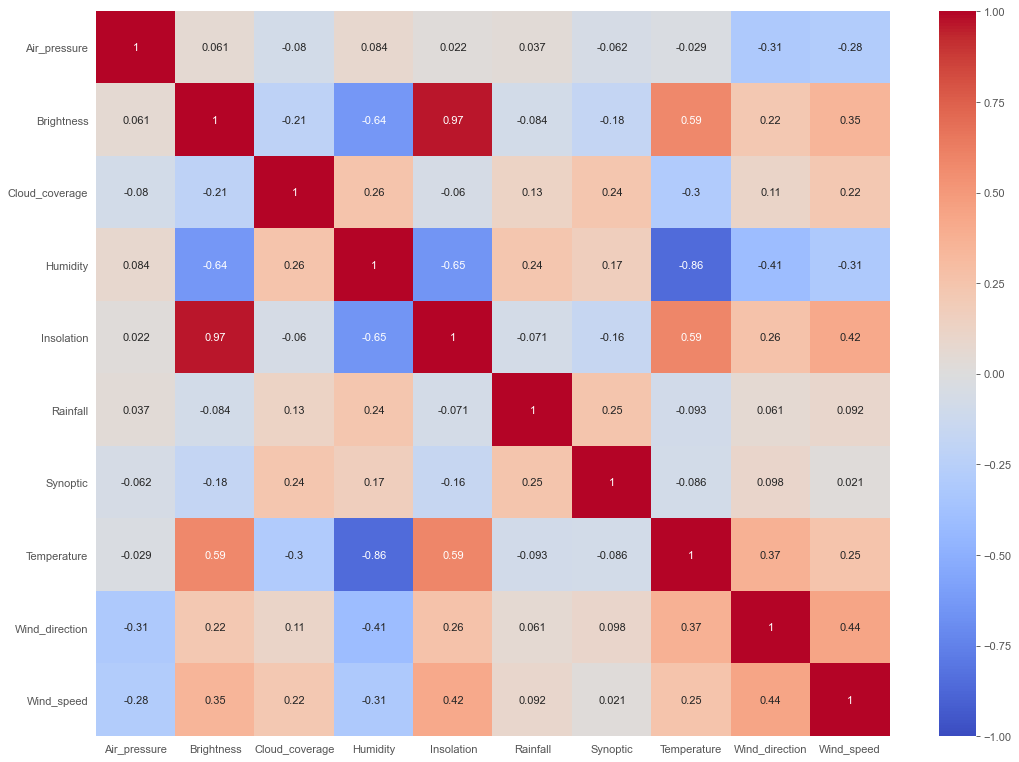

In [41]:
 f = plt.figure(1, figsize=(16,12))
sns.heatmap(merge_mediums_445.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True)

#### Building668 : Merge all mediums with raw input data 

In [42]:
# Create an empty dataframe, having all the mediums of Building668 as columns  
merge_mediums_668 = pd.DataFrame(columns=['DateTime', 'Air_pressure', 'Brightness', 'Cloud_coverage', 'Humidity', 
                                           'Insolation', 'Rainfall', 'Synoptic', 'Temperature', 'Wind_direction', 'Wind_speed'])

In [43]:
## Collect all the mediums that belongs to Building668 into a single dataframe. 
## Since all the mediums have same timestamp its simple to merge them all

merge_mediums_668['DateTime'] = air_pressure_668['Time']

merge_mediums_668['Air_pressure'] = air_pressure_668['weather.mean']
merge_mediums_668['Brightness']   = brightness_668['weather.mean']

merge_mediums_668['Cloud_coverage'] = cloud_coverage_668['weather.mean']
merge_mediums_668['Humidity'] = humidity_668['weather.mean']

merge_mediums_668['Insolation'] = insolation_668['weather.mean']
merge_mediums_668['Rainfall'] = rainfall_668['weather.mean']

merge_mediums_668['Synoptic'] = synoptic_code_668['weather.mean']
merge_mediums_668['Temperature'] = temperature_668['weather.mean']

merge_mediums_668['Wind_direction'] = wind_direction_668['weather.mean']
merge_mediums_668['Wind_speed'] = wind_speed_668['weather.mean']

In [44]:
merge_mediums_668.head()

,DateTime,Air_pressure,Brightness,Cloud_coverage,Humidity,Insolation,Rainfall,Synoptic,Temperature,Wind_direction,Wind_speed
0,2021-07-30 00:00:00,1000.0,0.0,87.9,97.2,11.7,0.0,0.0,12.6,304.0,0.699
1,2021-07-30 00:15:00,1000.0,0.0,87.9,97.2,11.7,0.0,0.0,12.6,304.0,0.699
2,2021-07-30 00:30:00,1000.0,0.0,87.9,97.2,11.7,0.0,0.0,12.6,304.0,0.699
3,2021-07-30 00:45:00,1000.0,0.0,87.9,97.2,11.7,0.0,0.0,12.6,304.0,0.699
4,2021-07-30 01:00:00,1000.0,0.0,87.9,97.2,11.7,0.0,0.0,12.6,304.0,0.699


#### Building668: corellation between the rawinput data

<AxesSubplot:>

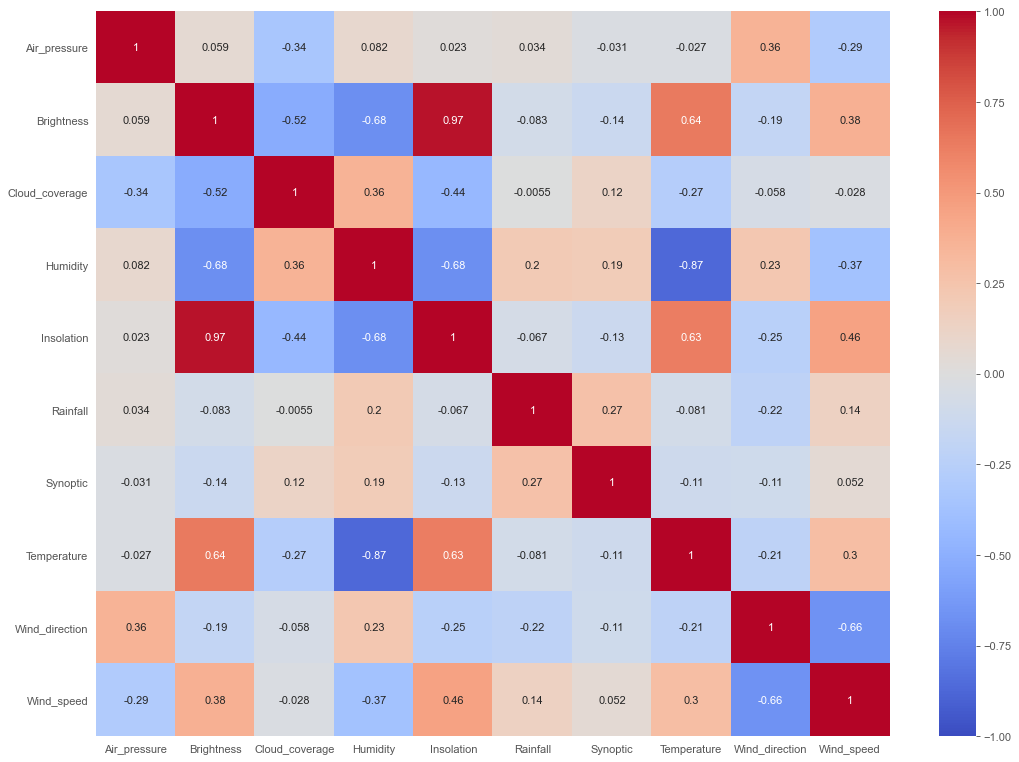

In [45]:
f = plt.figure(1, figsize=(16,12))
sns.heatmap(merge_mediums_668.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True)

#### Building445: Merge all the daily average intoa a single data frame for data analysis

In [46]:
daily_merge_mediums_445   = pd.DataFrame(columns=['DateTime', 'Air_pressure', 'Brightness', 'Cloud_coverage', 'Humidity', 
                                           'Insolation', 'Rainfall', 'Synoptic', 'Temperature', 'Wind_direction', 'Wind_speed'])

In [47]:
daily_merge_mediums_445['DateTime'] = daily_average_list_445[0]['Date']

daily_merge_mediums_445['Air_pressure'] = daily_average_list_445[0]['Daily_Average']
daily_merge_mediums_445['Brightness'] = daily_average_list_445[1]['Daily_Average']

daily_merge_mediums_445['Cloud_coverage'] = daily_average_list_445[2]['Daily_Average']
daily_merge_mediums_445['Humidity'] = daily_average_list_445[3]['Daily_Average']

daily_merge_mediums_445['Insolation'] = daily_average_list_445[4]['Daily_Average']
daily_merge_mediums_445['Rainfall'] = daily_average_list_445[5]['Daily_Average']

daily_merge_mediums_445['Synoptic'] = daily_average_list_445[6]['Daily_Average']
daily_merge_mediums_445['Temperature'] = daily_average_list_445[7]['Daily_Average']

daily_merge_mediums_445['Wind_direction'] = daily_average_list_445[8]['Daily_Average']
daily_merge_mediums_445['Wind_speed'] = daily_average_list_445[9]['Daily_Average']

In [48]:
daily_merge_mediums_445

,DateTime,Air_pressure,Brightness,Cloud_coverage,Humidity,Insolation,Rainfall,Synoptic,Temperature,Wind_direction,Wind_speed
0,2021-07-30,996.635417,47671.354167,22.555542,66.003125,283.550250,0.002563,0.893125,20.805208,189.642708,1.590677
1,2021-07-31,996.885417,39596.101042,23.069531,57.608333,252.667333,0.010213,1.741042,20.776042,224.425000,2.488323
2,2021-08-01,996.531250,22798.114271,53.148010,74.200000,175.315958,0.207296,5.690000,18.381250,204.229167,2.563229
3,2021-08-02,1000.614583,26196.666667,47.856146,77.121875,203.360625,0.297466,4.789271,17.679167,204.000000,2.369135
4,2021-08-03,999.979167,17502.705208,60.666667,86.259375,147.795024,3.355969,11.094062,16.100000,176.208333,1.824750
5,2021-08-04,999.156250,22311.132292,65.351042,72.626042,188.813324,0.419189,8.126771,18.056250,199.718750,1.583052
6,2021-08-05,995.906250,31076.315625,46.630312,76.188542,223.857920,0.060517,4.054167,19.076042,202.625000,2.543229
7,2021-08-06,993.552083,22848.114583,55.383437,75.663542,183.165148,0.639921,6.917083,19.092708,198.656250,2.477375
8,2021-08-07,992.468750,13889.791667,53.091344,79.198958,113.878719,0.268647,6.593438,17.790625,178.677083,1.830979
9,2021-08-08,999.125000,28622.836458,39.743646,77.323958,196.635833,0.562782,5.307292,17.525000,192.770833,2.240594


#### Building445: Correlation for daily average 

<AxesSubplot:>

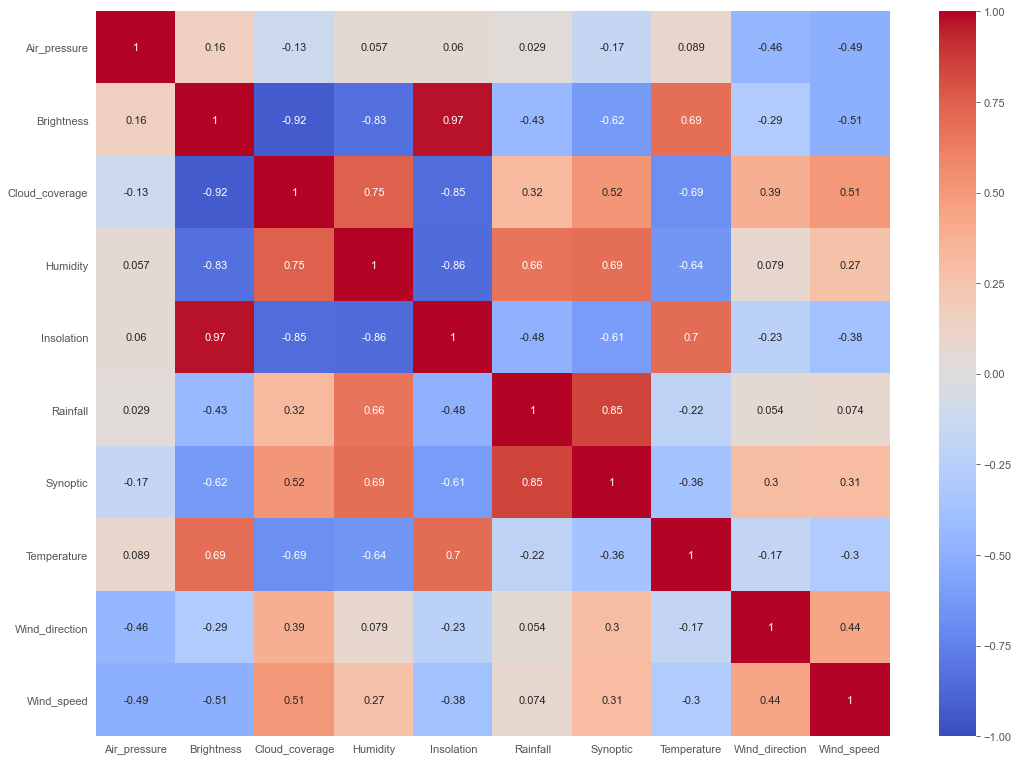

In [49]:
f = plt.figure(1, figsize=(16,12))
sns.heatmap(daily_merge_mediums_445.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True)

####  Building668: Merge all the daily average intoa a single data frame for data analysis

In [50]:
daily_merge_mediums_668   = pd.DataFrame(columns=['DateTime', 'Air_pressure', 'Brightness', 'Cloud_coverage', 'Humidity', 
                                           'Insolation', 'Rainfall', 'Synoptic', 'Temperature', 'Wind_direction', 'Wind_speed'])

In [51]:
daily_merge_mediums_668['DateTime'] = daily_average_list_668[0]['Date']

daily_merge_mediums_668['Air_pressure'] = daily_average_list_668[0]['Daily_Average']
daily_merge_mediums_668['Brightness'] = daily_average_list_668[1]['Daily_Average']

daily_merge_mediums_668['Cloud_coverage'] = daily_average_list_668[2]['Daily_Average']
daily_merge_mediums_668['Humidity'] = daily_average_list_668[3]['Daily_Average']

daily_merge_mediums_668['Insolation'] = daily_average_list_668[4]['Daily_Average']
daily_merge_mediums_668['Rainfall'] = daily_average_list_668[5]['Daily_Average']

daily_merge_mediums_668['Synoptic'] = daily_average_list_668[6]['Daily_Average']
daily_merge_mediums_668['Temperature'] = daily_average_list_668[7]['Daily_Average']

daily_merge_mediums_668['Wind_direction'] = daily_average_list_668[8]['Daily_Average']
daily_merge_mediums_668['Wind_speed'] = daily_average_list_668[9]['Daily_Average']

In [52]:
daily_merge_mediums_668

,DateTime,Air_pressure,Brightness,Cloud_coverage,Humidity,Insolation,Rainfall,Synoptic,Temperature,Wind_direction,Wind_speed
0,2021-07-30,997.489583,49695.486458,48.778920,72.040625,317.753125,0.000000,0.000000,20.493750,174.267708,1.535302
1,2021-07-31,997.666667,41551.364583,59.277251,61.688542,290.775208,0.000000,0.000000,20.791667,127.330208,2.092333
2,2021-08-01,997.322917,23281.903125,77.251299,77.414583,196.137917,0.149166,2.586458,18.358333,92.878125,2.190635
3,2021-08-02,1001.197917,26904.315625,78.570208,80.432292,220.031563,0.381561,2.511458,17.561458,110.597917,2.056885
4,2021-08-03,1000.770833,18006.013542,81.606250,89.001042,169.814583,4.191667,9.718437,15.995833,137.821875,1.717990
5,2021-08-04,1000.010417,24094.795833,82.682292,77.273958,218.959792,0.371924,2.788542,17.879167,132.920833,1.452479
6,2021-08-05,996.770833,32469.086458,73.294792,79.400000,251.671667,0.057097,1.701042,19.119792,92.312500,2.144125
7,2021-08-06,994.281250,24076.104167,79.169792,79.752083,206.259063,0.763177,3.292708,19.022917,124.855208,2.082667
8,2021-08-07,993.177083,14053.375000,82.058333,83.560417,135.869687,0.301228,3.931562,17.572917,146.678125,1.699500
9,2021-08-08,999.864583,29271.419792,71.655773,80.952083,221.694167,0.535331,2.783021,17.404167,112.457292,2.103344


<AxesSubplot:>

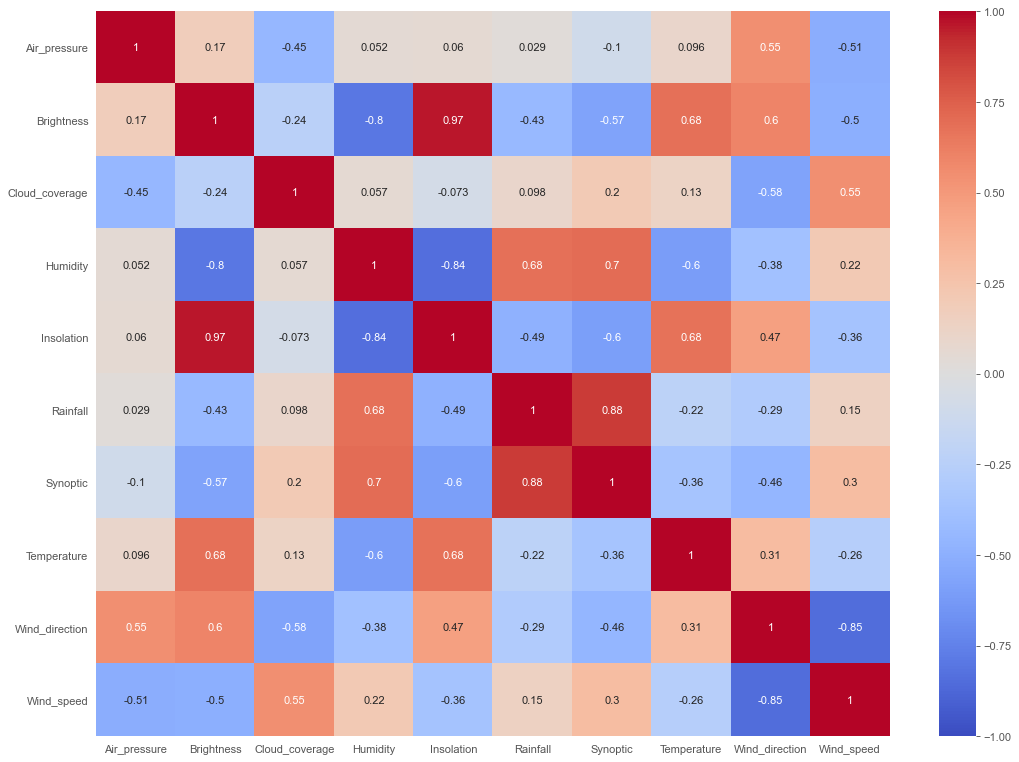

In [53]:
f = plt.figure(1, figsize=(16,12))
sns.heatmap(daily_merge_mediums_668.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True)

## Hourly calculations

#### Building445 Hourly calculations 

In [78]:
hourly_air_pressure_445 = air_pressure_445.set_index('Time')
hourly_air_pressure_445 = hourly_air_pressure_445.resample('1h').mean()

hourly_brightness_445 = brightness_445.set_index('Time')
hourly_brightness_445 = hourly_brightness_445.resample('1h').mean()

hourly_cloud_coverage_445 = cloud_coverage_445.set_index('Time')
hourly_cloud_coverage_445 = hourly_cloud_coverage_445.resample('1h').mean()

hourly_humidity_445  = humidity_445.set_index('Time')
hourly_humidity_445  = hourly_humidity_445.resample('1h').mean()

hourly_insolation_445 = insolation_445.set_index('Time')
hourly_insolation_445 = hourly_insolation_445.resample('1h').mean()

hourly_rainfall_445 = rainfall_445.set_index('Time')
hourly_rainfall_445 = hourly_rainfall_445.resample('1h').mean()

hourly_synoptic_code_445 = synoptic_code_445.set_index('Time')
hourly_synoptic_code_445 = hourly_synoptic_code_445.resample('1h').mean()

hourly_temperature_445 = temperature_445.set_index('Time')
hourly_temperature_445 = hourly_temperature_445.resample('1h').mean()

hourly_wind_direction_445 = wind_direction_445.set_index('Time')
hourly_wind_direction_445 = hourly_wind_direction_445.resample('1h').mean()

hourly_wind_speed_445 = wind_speed_445.set_index('Time')
hourly_wind_speed_445 = hourly_wind_speed_445.resample('1h').mean()

#### Building668 Hourly calculations 

In [80]:
hourly_air_pressure_668 = air_pressure_668.set_index('Time')
hourly_air_pressure_668 = hourly_air_pressure_668.resample('1h').mean()

hourly_brightness_668 = brightness_668.set_index('Time')
hourly_brightness_668 = hourly_brightness_668.resample('1h').mean()

hourly_cloud_coverage_668 = cloud_coverage_668.set_index('Time')
hourly_cloud_coverage_668 = hourly_cloud_coverage_668.resample('1h').mean()

hourly_humidity_668  = humidity_668.set_index('Time')
hourly_humidity_668  = hourly_humidity_668.resample('1h').mean()

hourly_insolation_668 = insolation_668.set_index('Time')
hourly_insolation_668 = hourly_insolation_668.resample('1h').mean()

hourly_rainfall_668 = rainfall_668.set_index('Time')
hourly_rainfall_668 = hourly_rainfall_668.resample('1h').mean()

hourly_synoptic_code_668 = synoptic_code_668.set_index('Time')
hourly_synoptic_code_668 = hourly_synoptic_code_668.resample('1h').mean()

hourly_temperature_668 = temperature_668.set_index('Time')
hourly_temperature_668 = hourly_temperature_668.resample('1h').mean()

hourly_wind_direction_668 = wind_direction_668.set_index('Time')
hourly_wind_direction_668 = hourly_wind_direction_668.resample('1h').mean()

hourly_wind_speed_668 = wind_speed_668.set_index('Time')
hourly_wind_speed_668 = hourly_wind_speed_668.resample('1h').mean()

## Plots

## Temporal Analysis: 
#### Daily and Hourly analysis of the weather features

In [84]:
times = pd.DatetimeIndex(daily_merge_mediums_445.DateTime)

In [98]:
sns.set(rc={"figure.figsize": (10, 6)})
colors = ["yellowgreen","dodgerblue","slategray"]

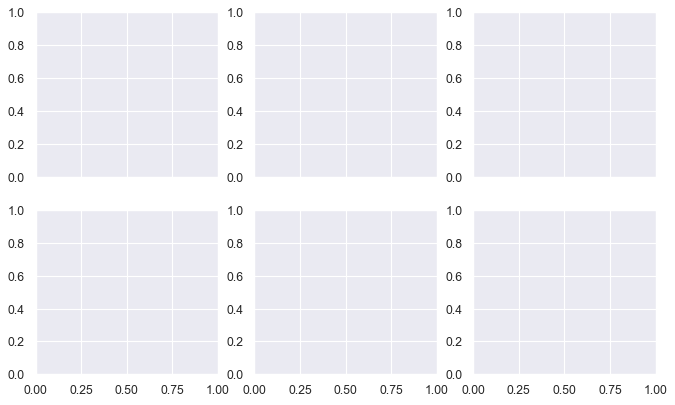

In [109]:
f, axes = plt.subplots(2,3, sharex=True)
axes = axes.flatten()
color = colors[0]

In [111]:
# plots
ax0 = axes[0]
g0 = sns.lineplot(data=daily_merge_mediums_668, x="DateTime", y="Air_pressure", ax=ax0, color = color)
#ax1.title.set_text("Apparent temperature")
ax0.set(ylabel="Air temperature (ºC)")
f.tight_layout()

### Building668: Plot heatmap for raw merged data 

/Users/khazi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weather.mean', ylabel='Density'>

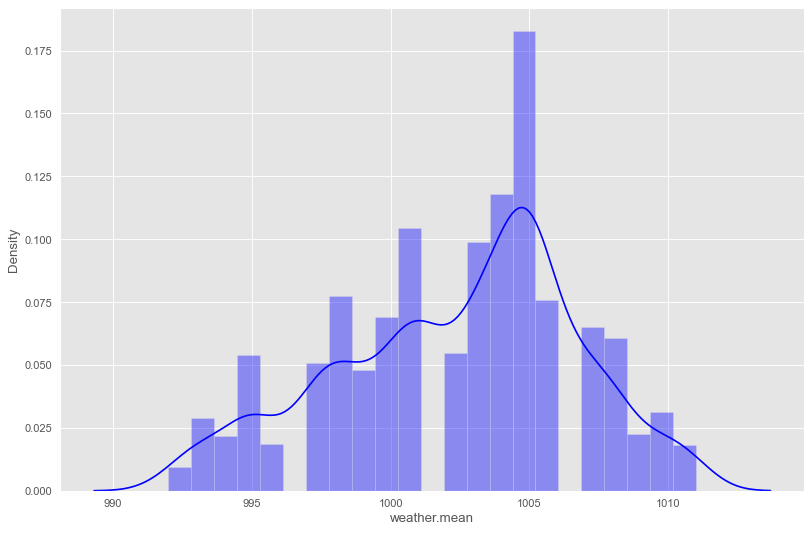

In [58]:
sns.distplot(air_pressure_668['weather.mean'], color='Blue')

/Users/khazi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/khazi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperature (bar)')

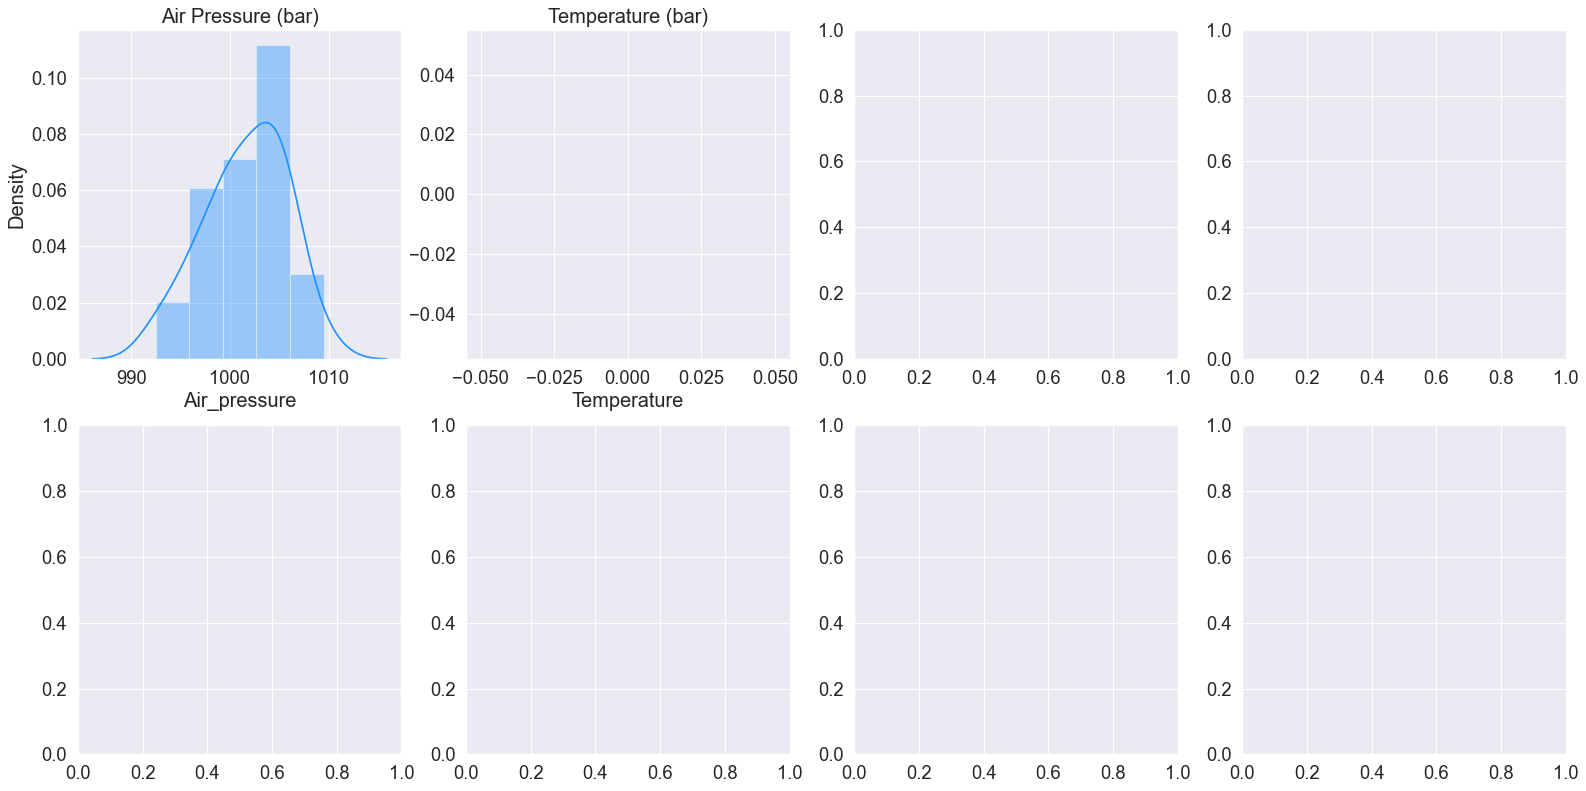

In [139]:
sns.set(rc = {'figure.figsize' : (24,12)})
sns.set(font_scale = 1.5)
f, axes = plt.subplots(2,4)
axes = axes.flatten()
color = "dodgerblue"

ax0 = axes[0]
g0 = sns.distplot(daily_merge_mediums_445.Air_pressure, ax=ax0, color = color)
ax0.set_title("Air Pressure (bar)")

ax1 = axes[1]
g1 = sns.lineplot(daily_merge_mediums_445.Temperature, ax=ax1, color = color)
ax1.set_title("Temperature (bar)")

In [135]:
#fig = plt.figure()        # an empty figure with no Axes
#fig, ax = plt.subplots()  # a figure with a single Axes
#fig2, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

### Daily Weather Features

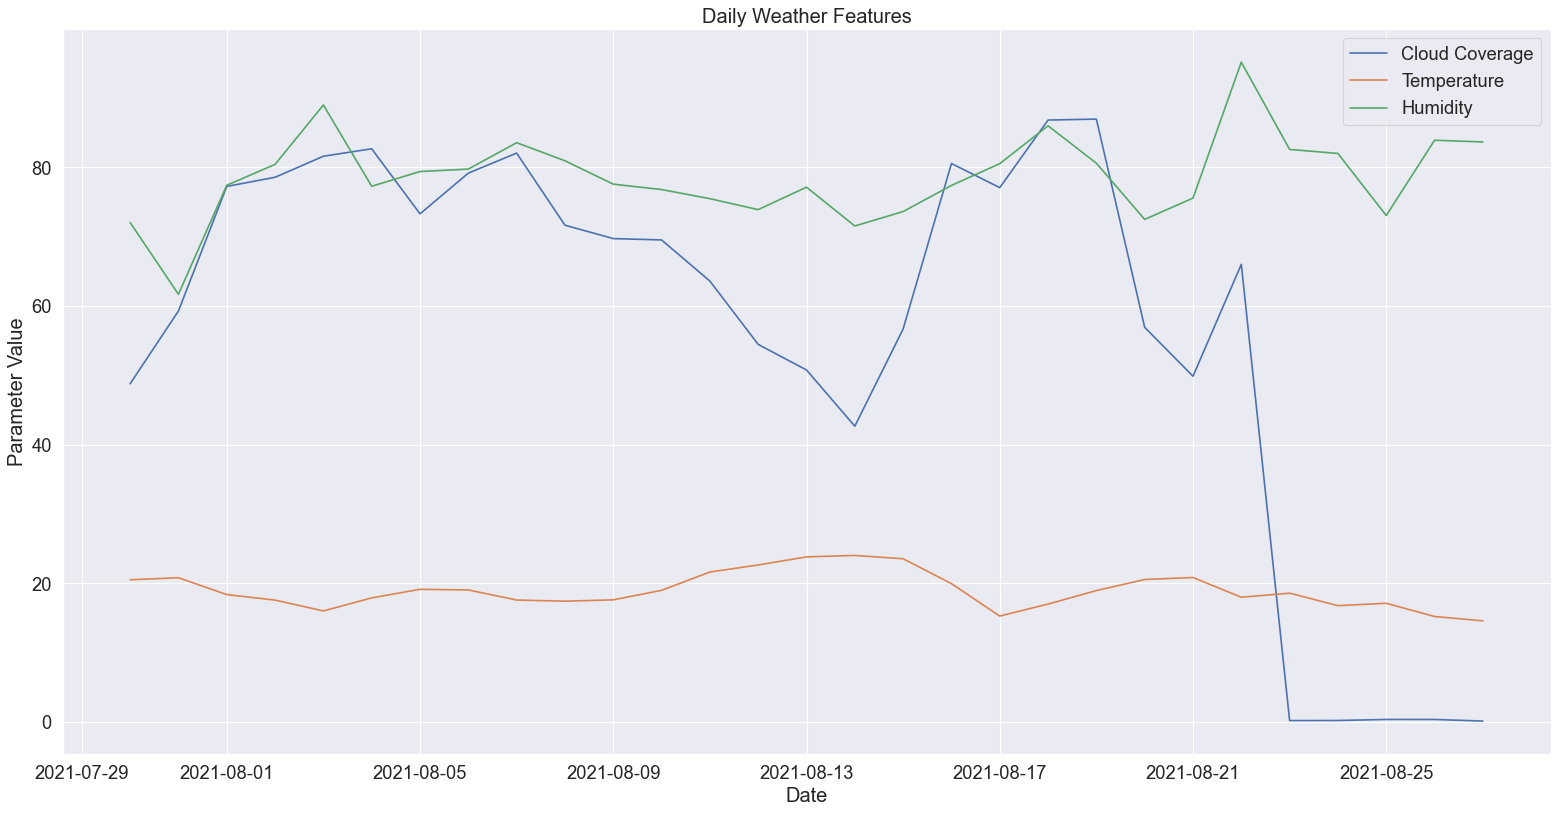

In [134]:
#plt.plot(daily_merge_mediums_668.DateTime, daily_merge_mediums_668.Air_pressure, label='Air Pressure')  # Plot some data on the (implicit) axes.
plt.plot(daily_merge_mediums_668.DateTime, daily_merge_mediums_668.Cloud_coverage, label='Cloud Coverage')  # Plot some data on the (implicit) axes.
plt.plot(daily_merge_mediums_668.DateTime, daily_merge_mediums_668.Temperature, label='Temperature')  # Plot some data on the (implicit) axes.
plt.plot(daily_merge_mediums_668.DateTime, daily_merge_mediums_668.Humidity, label='Humidity')  # Plot some data on the (implicit) axes.

plt.xlabel('Date')
plt.ylabel('Parameter Value')
plt.title("Daily Weather Features")
plt.legend()

In [124]:
daily_merge_mediums_668

,DateTime,Air_pressure,Brightness,Cloud_coverage,Humidity,Insolation,Rainfall,Synoptic,Temperature,Wind_direction,Wind_speed
0,2021-07-30,997.489583,49695.486458,48.778920,72.040625,317.753125,0.000000,0.000000,20.493750,174.267708,1.535302
1,2021-07-31,997.666667,41551.364583,59.277251,61.688542,290.775208,0.000000,0.000000,20.791667,127.330208,2.092333
2,2021-08-01,997.322917,23281.903125,77.251299,77.414583,196.137917,0.149166,2.586458,18.358333,92.878125,2.190635
3,2021-08-02,1001.197917,26904.315625,78.570208,80.432292,220.031563,0.381561,2.511458,17.561458,110.597917,2.056885
4,2021-08-03,1000.770833,18006.013542,81.606250,89.001042,169.814583,4.191667,9.718437,15.995833,137.821875,1.717990
5,2021-08-04,1000.010417,24094.795833,82.682292,77.273958,218.959792,0.371924,2.788542,17.879167,132.920833,1.452479
6,2021-08-05,996.770833,32469.086458,73.294792,79.400000,251.671667,0.057097,1.701042,19.119792,92.312500,2.144125
7,2021-08-06,994.281250,24076.104167,79.169792,79.752083,206.259063,0.763177,3.292708,19.022917,124.855208,2.082667
8,2021-08-07,993.177083,14053.375000,82.058333,83.560417,135.869687,0.301228,3.931562,17.572917,146.678125,1.699500
9,2021-08-08,999.864583,29271.419792,71.655773,80.952083,221.694167,0.535331,2.783021,17.404167,112.457292,2.103344


In [ ]:
sns.lineplot(data=daily_average_list[0], legend='ss')

In [ ]:
f, ax = plt.subplots(1, 1)
x_col='Dates'
y_col = 'Daily_Average'

#ax.plot(daily_average_list[0].Date, daily_average_list[0].Daily_Average, color="blue", label="A", linestyle="-")
#ax.plot_date(daily_average_list[1].Date, daily_average_list[1].Daily_Average, color="green", label="B", linestyle="-")
ax.plot_date(daily_average_list[2].Date, daily_average_list[1].Daily_Average, color="yellow", label="C", linestyle="-")

#ax.plot_date(df2.date, df2["count"], color="red", label="B", linestyle="-")
#ax.plot_date(df3.date, df3["count"], color="green", label="C", linestyle="-")

ax.legend()

plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(daily_average_list[0].Date, daily_average_list[0].Daily_Average)
ax1.set_title('Sharing Y axis')
ax2.plot(daily_average_list[1].Date, daily_average_list[1].Daily_Average)
ax2.set_title('Sharing Y axis')

ax2.plot(daily_average_list[2].Date, daily_average_list[2].Daily_Average)
ax2.set_title('Sharing Y axis')

In [ ]:
rows, cols = 2, 3
fig, ax = plt.subplots(rows, cols, sharex='col',sharey='row')

for row in range(rows):
    for col in range(cols):
        ax[row, col].text(0.5, 0.5, str((row, col)), color="green", fontsize=18, ha='center')

plt.show()

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Date',y='Daily_Average',data=daily_average_list[3])
plt.xticks(rotation=45)
plt.show()

In [ ]:
air_pressure_445.head()

### Genome data 